# VAE with MNIST Dataset

- model=VAE() in vae.py
- loss_function() in loss_function.py

## Load packages

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import os
import torch
import torch.utils.data
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from vae import VAE
from loss_function import loss_function

## Hyperparameters

In [3]:
seed = 1
batch_size = 128
log_interval = 10
epochs = 100
zdims = 20

## Set random seed

In [4]:
torch.manual_seed(seed)

## Load MNIST dataset

In [5]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

In [6]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

## Load model, optimizer

In [7]:
model = VAE(zdims)

In [8]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Train

In [9]:
def train(epoch) : 
    model.train() # toggle train mode
    train_loss = 0
    loss_train = []
    loss_valid = []
    
    # get batch loss for train set and backpropate
    for batch_idx, (data, _) in enumerate(train_loader) :
        data = Variable(data)
        optimizer.zero_grad()
        
        # Propagate
        recon_batch, mu, logvar = model(data)
        
        # Get loss value
        loss = loss_function(recon_batch, data, mu, logvar, batch_size)
        
        # Backpropagate
        loss.backward()
        train_loss += loss.item()
        
        # Update weights
        optimizer.step()
        
        # Inform
        '''
        if batch_idx % log_interval == 0 :
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
        '''
            
            
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    # get loss for whole validation set
    loss_valid.append(validate(1))
    
    # append to list 'loss_train' instance to plot later
    loss_train.append(train_loss / len(train_loader.dataset))
    
    return loss_train, loss_valid
    
    
def validate(epoch) : 
    model.eval() # toggle inference mode
    test_loss = 0
    
    for i, (data, _) in enumerate(test_loader) :
        data = Variable(data)
        
        # Propagate
        recon_batch, mu, logvar = model(data)
        
        # Get loss value
        test_loss += loss_function(recon_batch, data, mu, logvar, batch_size).item()
        
        # Inform
        if i == 0:
            n = min(data.size(0), 8)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    
    return test_loss

In [10]:
loss_train = []
loss_valid = []

for epoch in range(1, epochs+1) :
    temp_train, temp_valid = train(epoch)
    loss_train.append(temp_train)
    loss_valid.append(temp_valid)
    #test(epoch)
    
    sample = Variable(torch.randn(64, zdims))
    sample = model.decode(sample).cpu()

====> Epoch: 1 Average loss: 0.0016
====> Test set loss: 0.0012
====> Epoch: 2 Average loss: 0.0012
====> Test set loss: 0.0011
====> Epoch: 3 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 4 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 5 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 6 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 7 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 8 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 9 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 10 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 11 Average loss: 0.0011
====> Test set loss: 0.0010
====> Epoch: 12 Average loss: 0.0010
====> Test set loss: 0.0010
====> Epoch: 13 Average loss: 0.0010
====> Test set loss: 0.0010
====> Epoch: 14 Average loss: 0.0010
====> Test set loss: 0.0010
====> Epoch: 15 Average loss: 0.0010
====> Test set loss: 0.0010
====> Epoch: 16 Average loss: 0.00

## Check how model trained

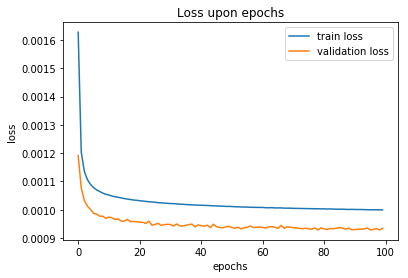

In [11]:
plt.plot(loss_train, label='train loss')
plt.plot(loss_valid, label='validation loss')
plt.title('Loss upon epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()